# Blueberry Mash

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Comparison between samples of UT blueberry data

In [2]:
df = pd.read_csv("SraRunTable.csv", delimiter="\t")
df

,BioSample,Experiment,Library_Name,MBases,MBytes,Organism,Run,SRA_Sample,Sample_Name,cultivar,...,LibrarySelection,LibrarySource,LoadDate,Platform,ReleaseDate,SRA_Study,age,geo_loc_name,growth_protocol,tissue
0,SAMN06036200,SRX2360398,SHB4.5_14,4662,3189,Vaccinium corymbosum,SRR5036116,SRS1808885,"RNA-Seq Vaccinium corymbosum root, pH 4.5",Emerald,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
1,SAMN06036203,SRX2360399,SHB6.5_11,8403,5791,Vaccinium corymbosum,SRR5036117,SRS1808886,"RNA-Seq Vaccinium corymbosum root, pH 6.5",Emerald,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
2,SAMN06036200,SRX2360400,SHB4.5_16,6914,4754,Vaccinium corymbosum,SRR5036118,SRS1808885,"RNA-Seq Vaccinium corymbosum root, pH 4.5",Emerald,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
3,SAMN06036200,SRX2360401,SHB4.5_15,7112,4866,Vaccinium corymbosum,SRR5036119,SRS1808885,"RNA-Seq Vaccinium corymbosum root, pH 4.5",Emerald,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
4,SAMN06036196,SRX2360402,VA4.5_8,4081,2803,Vaccinium arboreum,SRR5036120,SRS1808887,"RNA-Seq Vaccinium arboreum root, pH 4.5",FL09-502,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
5,SAMN06036196,SRX2360403,VA4.5_5,2833,1970,Vaccinium arboreum,SRR5036121,SRS1808887,"RNA-Seq Vaccinium arboreum root, pH 4.5",FL09-502,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
6,SAMN06036197,SRX2360404,VA6.5_1,3344,2292,Vaccinium arboreum,SRR5036122,SRS1808888,"RNA-Seq Vaccinium arboreum root, pH 6.5",FL09-502,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
7,SAMN06036196,SRX2360405,VA4.5_6,3600,2478,Vaccinium arboreum,SRR5036123,SRS1808887,"RNA-Seq Vaccinium arboreum root, pH 4.5",FL09-502,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
8,SAMN06036203,SRX2360406,SHB6.5_10,6491,4466,Vaccinium corymbosum,SRR5036124,SRS1808886,"RNA-Seq Vaccinium corymbosum root, pH 6.5",Emerald,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
9,SAMN06036203,SRX2360407,SHB6.5_12,6808,4725,Vaccinium corymbosum,SRR5036125,SRS1808886,"RNA-Seq Vaccinium corymbosum root, pH 6.5",Emerald,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root


In [45]:
def clean_name(name):
    name = name.split(".fast")[0]
    return name


In [30]:
df.loc[0]['Experiment']

'SRX2360398'

In [13]:
rows = []
labels = []
with open("data/sketches/distances", 'r') as f:
    for i in range(16):
        row = []
        for j in range(16):
            line = f.readline().strip()
            ref, tar, d, p, r = line.split("\t")
            row.append(float(d))
        rows.append(row)
seq = [0,2,3,12,1,8,9,15,4,5,7,11,6,10,13,14]
outrows = []
for i in range(16):
    labels.append(df.loc[seq[i]]['Library_Name'])
    outrow = []
    for j in range(16):
        outrow.append(rows[seq[i]][seq[j]])
    outrows.append(outrow)

heat = pd.DataFrame(outrows, index=labels, columns=labels)


            

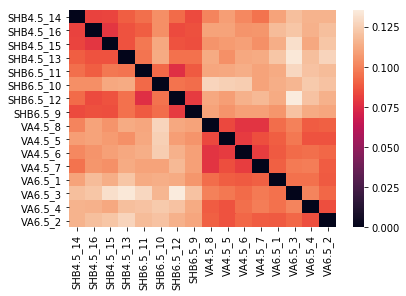

In [23]:
#viz
sns.heatmap(heat)
plt.show()
#plt.savefig("graphs/blueberry_utk.pdf", pad_inches=5)

## Comparison with other SRA blueberry samples (other species) 

In [66]:
df = pd.read_csv("newRunTable.csv", delimiter=",", header=None)
df

,0,1,2
0,SRR1282422,macrocarpon,American Cranberry
1,SRR5763209,ashei,Rabbiteye Blueberry
2,SRR5799278,vitis-idaea,Partridgeberry
3,SRR6277543,virgatum,Rabbiteye Blueberry
4,SRR6286470,myrtillus,Bilberry
5,SRR6906300,angustifolium,Lowbush Blueberry
6,SRX2360412,arboreum,Sparkleberry
7,SRX2360413,corymbosum,Highbush Blueberry
8,SRX4624119,dunalianum,South-China Blueberry


In [95]:
table = []
labels = []
with open("dist_comp", "r") as f:
    N = int(f.readline().strip()[0])
    for i in range(N):
        tmp = f.readline().strip().split("\t")
        labels.append( df.loc[i][1] )
        row = [float(val) for val in tmp[1:]]
        row.append(0.0)
        table.append( row )
print(table)
print(labels)

[[0.0], [0.263022, 0.0], [0.126974, 0.295981, 0.0], [0.147707, 0.243761, 0.12827, 0.0], [0.149777, 0.23011, 0.136948, 0.108487, 0.0], [0.145727, 0.263022, 0.132399, 0.113823, 0.130979, 0.0], [0.140258, 0.295981, 0.132399, 0.138572, 0.138572, 0.140258, 0.0], [0.136948, 0.243761, 0.12101, 0.147707, 0.161822, 0.138572, 0.111073, 0.0], [0.1233, 0.243761, 0.102997, 0.110193, 0.12827, 0.118834, 0.125715, 0.1233, 0.0]]
['macrocarpon', 'ashei', 'vitis-idaea', 'virgatum', 'myrtillus', 'angustifolium', 'arboreum', 'corymbosum', 'dunalianum']


In [74]:
heat = pd.DataFrame(table, index=labels, columns=labels)
heat

,macrocarpon,ashei,vitis-idaea,virgatum,myrtillus,angustifolium,arboreum,corymbosum,dunalianum
macrocarpon,0.000000,0.263022,0.126974,0.147707,0.149777,0.145727,0.140258,0.136948,0.123300
ashei,0.263022,0.000000,0.295981,0.243761,0.230110,0.263022,0.295981,0.243761,0.243761
vitis-idaea,0.126974,0.295981,0.000000,0.128270,0.136948,0.132399,0.132399,0.121010,0.102997
virgatum,0.147707,0.243761,0.128270,0.000000,0.108487,0.113823,0.138572,0.147707,0.110193
myrtillus,0.149777,0.230110,0.136948,0.108487,0.000000,0.130979,0.138572,0.161822,0.128270
angustifolium,0.145727,0.263022,0.132399,0.113823,0.130979,0.000000,0.140258,0.138572,0.118834
arboreum,0.140258,0.295981,0.132399,0.138572,0.138572,0.140258,0.000000,0.111073,0.125715
corymbosum,0.136948,0.243761,0.121010,0.147707,0.161822,0.138572,0.111073,0.000000,0.123300
dunalianum,0.123300,0.243761,0.102997,0.110193,0.128270,0.118834,0.125715,0.123300,0.000000


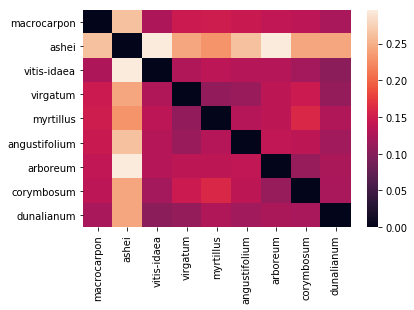

In [75]:
sns.heatmap(heat)
plt.show()

## Tree Forming With Biopython

In [82]:
from Bio import Phylo


In [96]:
dm = Phylo.TreeConstruction.DistanceMatrix(labels, table)
dm

DistanceMatrix(names=['macrocarpon', 'ashei', 'vitis-idaea', 'virgatum', 'myrtillus', 'angustifolium', 'arboreum', 'corymbosum', 'dunalianum'], matrix=[[0], [0.263022, 0], [0.126974, 0.295981, 0], [0.147707, 0.243761, 0.12827, 0], [0.149777, 0.23011, 0.136948, 0.108487, 0], [0.145727, 0.263022, 0.132399, 0.113823, 0.130979, 0], [0.140258, 0.295981, 0.132399, 0.138572, 0.138572, 0.140258, 0], [0.136948, 0.243761, 0.12101, 0.147707, 0.161822, 0.138572, 0.111073, 0], [0.1233, 0.243761, 0.102997, 0.110193, 0.12827, 0.118834, 0.125715, 0.1233, 0]])

In [113]:
constructor = Phylo.TreeConstruction.DistanceTreeConstructor()
tree = constructor.upgma(dm)
print(tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner8')
        Clade(branch_length=0.129534375, name='ashei')
        Clade(branch_length=0.06696587500000001, name='Inner7')
            Clade(branch_length=0.008685265624999994, name='Inner4')
                Clade(branch_length=0.061200500000000005, name='angustifolium')
                Clade(branch_length=0.006957000000000005, name='Inner2')
                    Clade(branch_length=0.0542435, name='myrtillus')
                    Clade(branch_length=0.0542435, name='virgatum')
            Clade(branch_length=0.0073172656249999996, name='Inner6')
                Clade(branch_length=0.01051574999999999, name='Inner3')
                    Clade(branch_length=0.0555365, name='corymbosum')
                    Clade(branch_length=0.0555365, name='arboreum')
                Clade(branch_length=0.003483749999999994, name='Inner5')
                    Clade(branch_length=0.011069999999999997, name='Inner1')
                        Clade(br

In [111]:
tree

Tree(rooted=True)

In [116]:
Phylo.draw(tree, branch_labels=None, do_show=False)
#plt.show()
plt.savefig('graphs/upgma.svg')